In [39]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [40]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    # You can also define other helper functions
    # Compute normalized histogram
    bins = np.arange(-0.5, 255+1,1)
    hist = np.histogram(im.flatten(), bins=bins)
    #print(len(hist))
    plt.imshow(im, cmap='gray')
    plt.show()
    plt.plot(hist[0])
    plt.show()
    #get the location of the maximum histogram value
    max_val= hist[0].argmax()
    print(max_val)
    
    threshold = 128
    return threshold
    ### END YOUR CODE HERE ###

Reading image: images/thumbprint.png


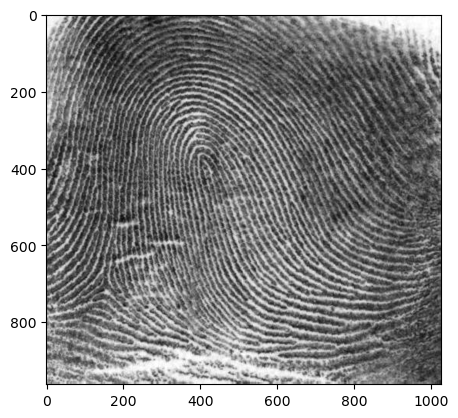

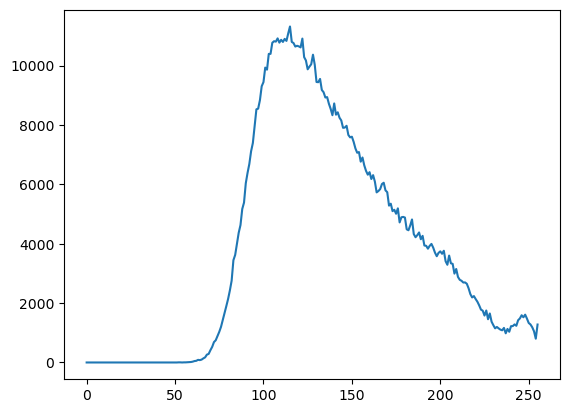

115
Found optimal threshold: 128
Saving image to: image_processed/thumbprint-segmented.png
Reading image: images/rice-shaded.png


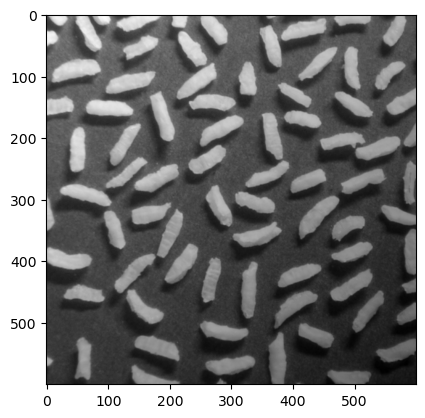

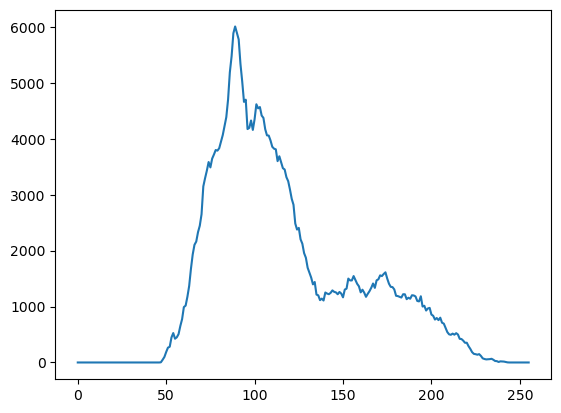

89
Found optimal threshold: 128
Saving image to: image_processed/rice-shaded-segmented.png


In [41]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)